In [5]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
#from IPython.display import YouTubeVideo

In [7]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [8]:
t = 0
dt = 0.001
for step in range(10):
    t = step * dt
    i = i_mean * (1 + np.sin((2*np.pi/0.01)*t))
    print(i)

2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


In [9]:
# initialize step_end and v
step_end = 10
v = el

# loop for step_end steps
for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((2*np.pi/0.01)*t))
    print(t,v)
    if v <= vth:
        v = (dt*(el-v+r*i)/tau)+v
    else:
        v = vr

0.0 -0.06
0.001 -0.05875
0.002 -0.056827768434634406
0.003 -0.05454755936753374
0.004 -0.05238136075378811
0.005 -0.05077756115073311
0.006 -0.049988683093196457
0.007 -0.07
0.008 -0.06943882064536895
0.009000000000000001 -0.06890570025846944


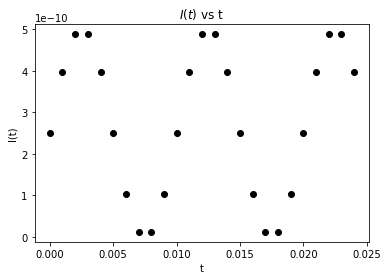

In [10]:
# initialize step_end
step_end = 25

# initialize the figure
plt.figure()
# Complete these lines and uncomment
plt.title("$I(t)$ vs t")
plt.xlabel('t')
plt.ylabel('I(t)')


# loop for step_end steps
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((2*np.pi/0.01)*t))
  plt.plot(t,i,'ko')

plt.show()

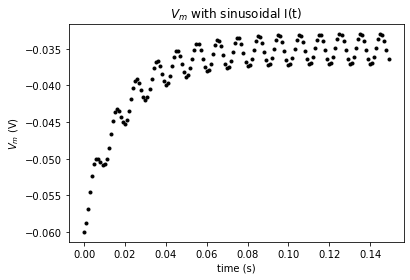

In [11]:
# initialize step_end and v
step_end = int(t_max / dt)
v = el

# initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)');

# loop for step_end steps
for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((2*np.pi/0.01)*t))
  # Complete this line and uncomment
  plt.plot(t,v,'k.')

  v = (dt*(el-v+r*i)/tau)+v

t = t + dt
# Complete this line and uncomment
# plt.plot(...)
plt.show()

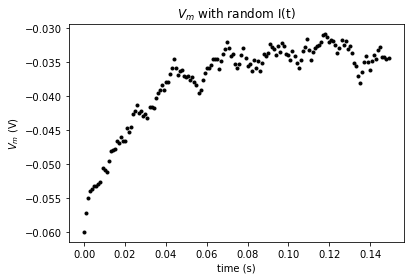

In [12]:
# set random number generator
np.random.seed(2020)

# initialize step_end and v
step_end = int(t_max / dt)
v = el
t = 0
# initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt
  # Complete this line and uncomment
  plt.plot(t,v,'k.')
  i = i_mean * (1 + 0.1*((t_max/dt)**0.5)*(2*np.random.random()-1))
  v = (dt*(el-v+r*i)/tau)+v

plt.show()

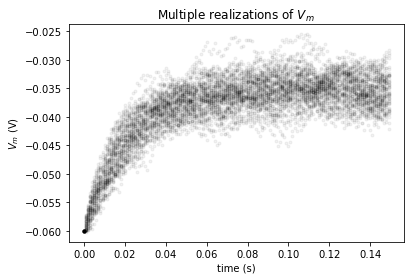

In [24]:
# set random number generator
np.random.seed(2020)

# initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
# Complete this line and uncomment
v_n = [el]*n

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt
  # Complete this line and uncomment
  plt.plot([t]*n,v_n,'k.',alpha = 0.05)

  # loop for n steps
  for j in range(0, n):
    i = i_mean * (1 + 0.1*((t_max/dt)**0.5)*(2*np.random.random()-1))
    # Complete this line and uncomment
    v_n[j] += (dt*(el-v_n[j]+r*i)/tau)

plt.show()

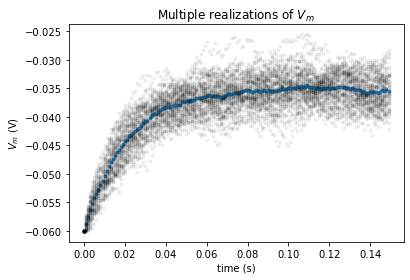

In [27]:
# set random number generator
np.random.seed(2020)

# initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  v_mean = sum(v_n)/n
  # Complete these lines and uncomment
  plt.plot(t,v_mean,'C0.',alpha=0.8)
  plt.plot([t]*n,v_n,'k.',alpha = 0.05)


  for j in range(0, n):
    i = i_mean * (1 + 0.1*((t_max/dt)**0.5)*(2*np.random.random()-1))
    v_n[j] += (dt*(el-v_n[j]+r*i)/tau)

plt.show()

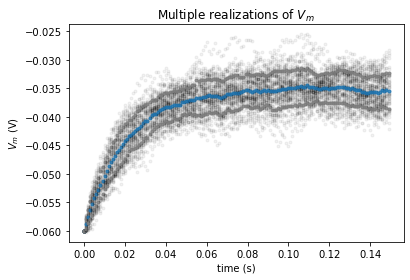

In [28]:
# set random number generator
np.random.seed(2020)

# initialize step_end, n and v_n
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):
  t = step * dt

  v_mean = sum(v_n)/n
  v_var_n = [(x-v_mean)**2 for x in v_n]
  v_var = sum(v_var_n)/(n-1)
  v_std = (v_var)**0.5

  # Complete these lines and uncomment
  plt.plot([t]*n,v_n,'k.',alpha = 0.05)
  plt.plot(t,v_mean,'C0.',alpha=0.8)
  plt.plot(t,v_mean+v_std,'C7.',alpha=0.8)
  plt.plot(t,v_mean-v_std,'C7.',alpha=0.8)


  for j in range(0, n):
    i = i_mean * (1 + 0.1*((t_max/dt)**0.5)*(2*np.random.random()-1))
    v_n[j] += (dt*(el-v_n[j]+r*i)/tau)

plt.show()

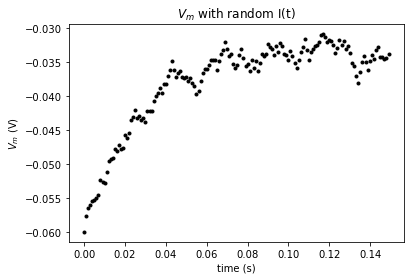

In [37]:
# set random number generator
np.random.seed(2020)

# initialize step_end, t_range, v and syn
step_end = 150
# skip the endpoint to match Exercise 7 plot
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)
syn = i_mean * (1 + 0.1*((t_max/dt)**0.5)*(2*np.random.random(step_end)-1))

# loop for step_end - 1 steps
# Complete these lines and uncomment
for step in range(1, step_end):
  v[step] = v[step-1] + (dt*(el-v[step-1]+ r*syn[step])/tau)


plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

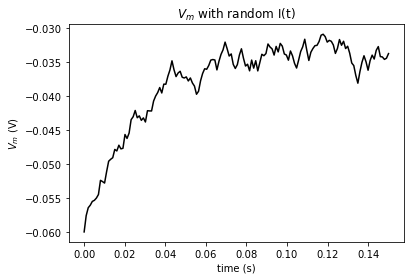

In [38]:
# set random number generator
np.random.seed(2020)

# initialize step_end, t_range, v and syn
step_end = int(t_max / dt)
t_range = np.linspace(0, t_max, num=step_end)
v = el * np.ones(step_end)
syn = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random(step_end) - 1))

# loop for step_end values of syn
for step, i in enumerate(syn):
  # skip first iteration
  if step==0:
    continue
  # Complete this line and uncomment
  v[step] = v[step-1] + (dt*(el-v[step-1]+ r*syn[step])/tau)

plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

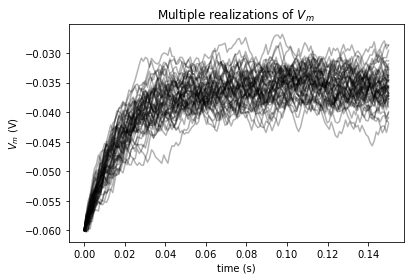

In [47]:
# set random number generator
np.random.seed(2020)

# initialize step_end, n, t_range, v and syn
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
syn = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n,step_end]) - 1))

# loop for step_end - 1 steps
# Complete these lines and uncomment
for step in range(1, step_end):
    v_n[:, step] = v_n[:,step-1] + (dt*(el-v_n[:,step-1]+ r*syn[:,step])/tau)

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Complete this line and uncomment
plt.plot(t_range, v_n[:-1].T, 'k',alpha = 0.3)
plt.show()

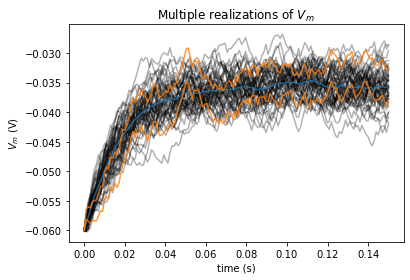

In [60]:
# set random number generator
np.random.seed(2020)

# initialize step_end, n, t_range, v and syn
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
syn = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# loop for step_end - 1 steps
for step in range(1, step_end):
  v_n[:,step] = v_n[:,step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * syn[:, step])

v_mean = np.mean(v_n,axis=0)
v_std = np.std(v_n,axis =0)

# initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n[:-1].T, 'k', alpha=0.3)

# Complete these lines and uncomment
plt.plot(t_range, v_n[-1], 'k', alpha=0.3, label=...)
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_n[-1] +v_std, 'C1', alpha=0.8)
plt.plot(t_range, v_n[-1] -v_std, 'C1', alpha=0.8, label=...)

#plt.legend()
plt.show()